In [2]:
from IPython.core.display import HTML
from notebook_css import css
HTML(css)

In [55]:
import os
import numpy as np
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import enn_v1_0
import feature_visualization as fv
import nn_visualizer as NV
from importlib import reload
reload(enn_v1_0)
reload(fv)
reload(NV)

from enn_v1_0 import get_terms_collection as gtc
from enn_v1_0 import get_terms_expression as gte
from enn_v1_0 import non_linear_transform
fv.style_setup(plt)

T1 = np.array([
    [1, 0],
    [1.25, 1],
])
T2 = np.array([
    [np.cos(np.pi/6), np.sin(np.pi/6)],
    [-np.sin(np.pi/6), np.cos(np.pi/6)]
])

size = [4] * 2
xy_coords = fv.sampling('square', 'matplotlib', size[0])
z1 = np.linspace(0, 1, size[0]*size[1]).reshape(size)


# outputs_s = non_linear_transform(xy_coords.T, terms, T1, T2)
# for terms, outputs in outputs_s:
#     exp = ', '.join(gte(terms))
#     NV.nn_visualizer.transformation_plot(xy_coords.reshape(2, *size),
#                                          outputs.T.reshape(2, *size),
#                                          z1, '$ %s $' % exp)
#     plt.savefig(os.path.join('screen_shots', 'T1&T2', 
#                              exp + '@T1&T2'), dpi=180)

# exchanging two rows.
def f(T):
    print(T)
    NV.nn_visualizer.transformation_plot(xy_coords.reshape(2, *size),
                                     (xy_coords.T @ T).T.reshape(2, *size),
                                     z1)
    T_1 = T.copy()
    T_1[[0,1]] = T_1[[1,0]]
    print(T_1)
    NV.nn_visualizer.transformation_plot(xy_coords.reshape(2, *size),
                                     (xy_coords.T @ T_1).T.reshape(2, *size),
                                     z1)
    T_2 = T.copy()
    T_2[:,[0,1]] = T_2[:,[1,0]]
    print(T_2)
    NV.nn_visualizer.transformation_plot(xy_coords.reshape(2, *size),
                                    (xy_coords.T @ T_2).T.reshape(2, *size),
                                         z1)

    
# exchanging x and y coords.
def f1(T):
    print(xy_coords)
    NV.nn_visualizer.transformation_plot(xy_coords.reshape(2, *size),
                                     (xy_coords.T @ T).T.reshape(2, *size),
                                     z1)
    
    xy_coords_1 = xy_coords.copy()
    xy_coords_1[[0,1]] = xy_coords_1[[1,0]]
    print(xy_coords_1)
    NV.nn_visualizer.transformation_plot(xy_coords_1.reshape(2, *size),
                                    (xy_coords_1.T @ T).T.reshape(2, *size),
                                         z1)    
# f(T2)

"""
1.stacking of T1 and T2.
2.multiplication of T1 and T2.
"""

'\n1.stacking of T1 and T2.\n2.multiplication of T1 and T2.\n'

<IPython.core.display.Javascript object>


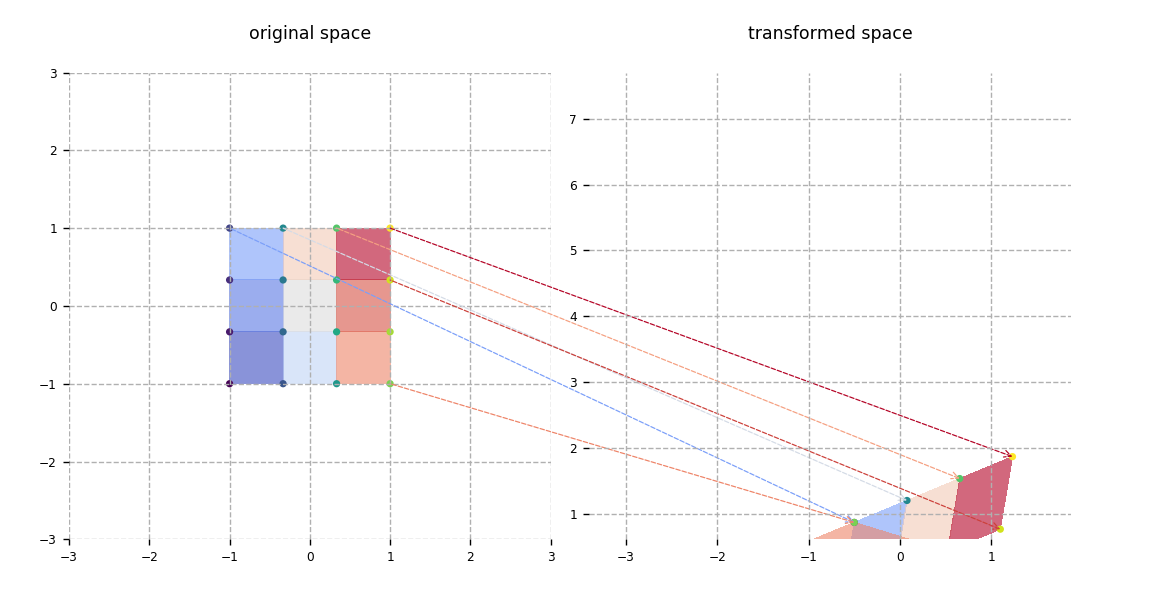

In [56]:
terms = np.array([
    [0, 1],
    [0, 1],
    [1, 1],
    [0, 2]
])

from enn_v1_0 import feature_polynomial_transform

out = feature_polynomial_transform(
    xy_coords.T, terms[[2,3]]).dot(np.vstack([T2]))
NV.nn_visualizer.transformation_plot(xy_coords.reshape(2, *size),
                                     out.T.reshape(2, *size),
                                     z1,
                                     density=1)

In [ ]:
"""
1.输入的样本点
判断空间维度m
2.*原始的线性变换序列
序列堆叠的次序？（会有多余的->并没产生多余）
->得到隐空间的维度m'
所有排列组合的情况
排列组合的顺序？（会产生多余的，但他们只是标签不同；此次试验中未产生）
特征的候选集（特征的选择方案的多样性）
"""